In [137]:
#load packa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [138]:
#processed data
df = pd.read_csv("/Users/cameronrichardson/Documents/School/Thesis/Code/data/pk1pk2_fit")


#Millero 1995, (Roy 1993 and GP 1989 combined (pHSWS), 20 C)
milleropK1 =  5.894517794062547 
milleropK1er = 0.0012
milleropK2 =  9.00341509068859 
milleropK2er = 0.0025

#Goyet and Poisson 1989 on sw scale 
GPpK1 =  5.906198989947367
GPpK1er = 0.007
GPpK2 =  9.025871657908935
GPpK2er = 0.011

#Using Mojica & Millero 2002 formulation (sw):
MM_pK1 =  5.882429664074465 
MM_pK2 =  9.028400445340822 


#Dickson and Millero 1989, Hansson and Mehrbach combined refit on pH(SWS)
DM_pK1 =  5.894803850288249 
DMpK1er = 0.008
DM_pK2 =  9.026224212423672 
DMpK1er = 0.013

#Using Roy1993 formulation (asw) on pH(SWS):
RpK1 =  5.903256720160065 
RpK1er = 0.0035
RpK2 =  9.020510368549857 
RpK2er = 0.0030

#Oscar cbsyst fit
cbpK1 =  5.891361636131243
cbpK2 =  9.046018082985647


avg_pk1fit = np.mean([milleropK1, GPpK1, DM_pK1, RpK1, MM_pK1])
avg_pk2fit = np.mean([milleropK2, GPpK2, DM_pK2, RpK2,MM_pK2])

df['delta_cbpK1'] = df[' pK1'] - cbpK1
df['delta_cbpK2'] = df[' pK2'] - cbpK2

df['delta_avg_pk1fit'] = df[' pK1'] - avg_pk1fit
df['delta_avg_pk2fit'] = df[' pK2'] - avg_pk2fit

df['delta_pK1_DM'] = df[' pK1'] - DM_pK1
df['delta_pK2_DM'] = df[' pK2'] - DM_pK2

df['delta_pK1_MM'] = df[' pK1'] - MM_pK1
df['delta_pK2_MM'] = df[' pK2'] - MM_pK2

df['delta_pK1_GP'] = df[' pK1'] - GPpK1
df['delta_pK2_GP'] = df[' pK2'] - GPpK2

df['delta_pK1_Roy'] = df[' pK1'] - RpK1
df['delta_pK2_Roy'] = df[' pK2'] - RpK2

df['delta_pK1_Millero'] = df[' pK1'] - milleropK1
df['delta_pK2_Millero'] = df[' pK2'] - milleropK2


avg_delta_pk1fit = df['delta_avg_pk1fit'].mean()
avg_delta_pk2fit = df['delta_avg_pk2fit'].mean()

#################
avg_pk2pk1fit = avg_pk2fit-avg_pk1fit


df['delta_cbpk2pk1'] = df['delta_cbpK2']-df['delta_cbpK1']

df['delta_avg_pk2pk1fit'] = df['delta_avg_pk2fit']-df['delta_avg_pk1fit']

df['delta_pk2pk1_DM'] = df['delta_pK2_DM'] - df['delta_pK1_DM']

df['delta_pk2pk1_GP'] = df['delta_pK2_GP'] - df['delta_pK1_GP']

df['delta_pk2pk1_Roy'] = df['delta_pK2_Roy'] - df['delta_pK1_Roy']

df['delta_pk2pk1_Millero'] = df['delta_pK2_Millero'] - df['delta_pK1_Millero']

df['delta_pk2pk1_MM'] = df['delta_pK2_MM'] - df['delta_pK1_MM']

avg_delta_pk2pk1fit = df['delta_avg_pk2pk1fit'].mean()


batches = {ID: group for ID, group in df.groupby('batch')}

colors = {
    'BP15': 'blue',
    'BP16': 'green',
    'BP17': 'orange',
}
avg_delta_pk1fit

np.float64(-0.021698697420750774)

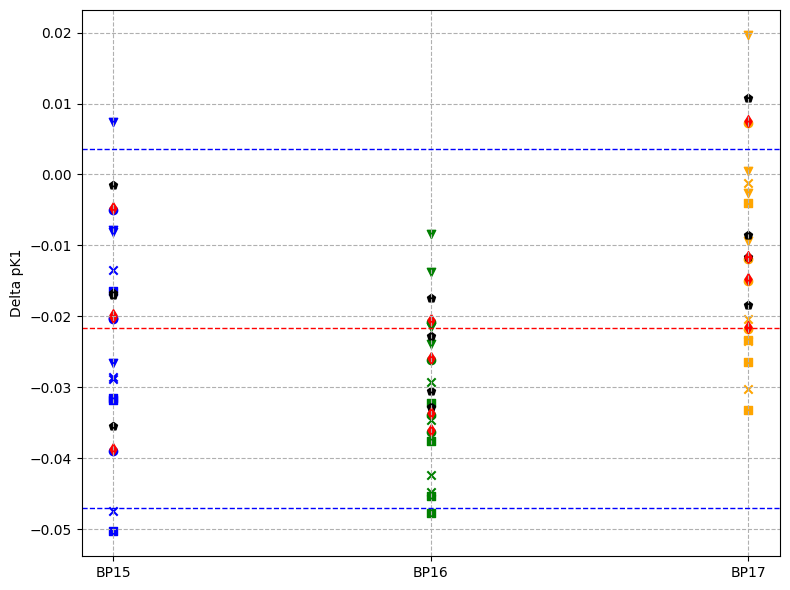

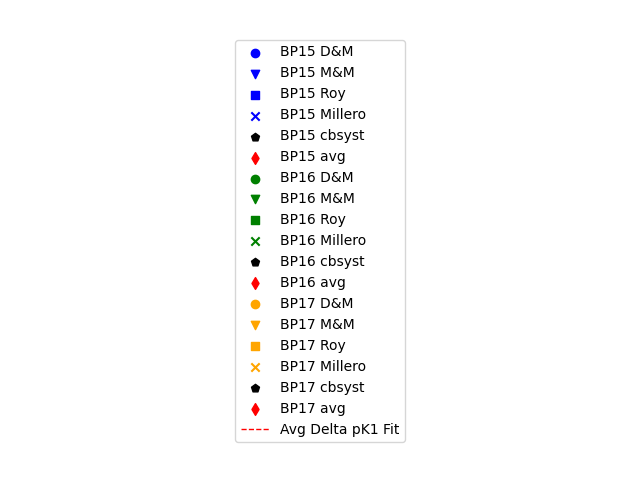

np.float64(-0.021698697420750774)

In [139]:
fig, axs = plt.subplots( figsize=(8, 6))
# Calculate 2 sigma confidence intervals
conf_interval= 2 * np.std(df['delta_avg_pk1fit'])

# Plot confidence intervals for delta_pK1
axs.axhline(y=avg_delta_pk1fit + conf_interval, color='blue', linestyle='--', linewidth=1)
axs.axhline(y=avg_delta_pk1fit - conf_interval, color='blue', linestyle='--', linewidth=1)


# Plot delta_pK1

axs.set_ylabel("Delta pK1")
for ID, group in batches.items():
    axs.scatter(group['batch'], group['delta_pK1_DM'], color=colors[ID], label=f"{ID} D&M")
    axs.scatter(group['batch'], group['delta_pK1_MM'], color=colors[ID], marker ='v', label=f"{ID} M&M")
    axs.scatter(group['batch'], group['delta_pK1_GP'], color=colors[ID], marker='s', label=f"{ID} Roy")
    axs.scatter(group['batch'], group['delta_pK1_Roy'], color=colors[ID], marker='x', label=f"{ID} Millero")
    axs.scatter(group['batch'], group['delta_cbpK1'], color='black', marker='p', label=f"{ID} cbsyst")
    axs.scatter(group['batch'], group['delta_pK1_Millero'], color='red', marker='d', label=f"{ID} avg")
    
axs.axhline(y=avg_delta_pk1fit, color='red', linestyle='--', linewidth=1, label='Avg Delta pK1 Fit')
axs.grid(True, linestyle='--', alpha=1)
    

plt.tight_layout()
plt.show()

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(8, 6))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')
legend = ax_legend.legend(*axs.get_legend_handles_labels(), loc='center')
fig_legend.canvas.draw()



plt.show()
avg_delta_pk1fit

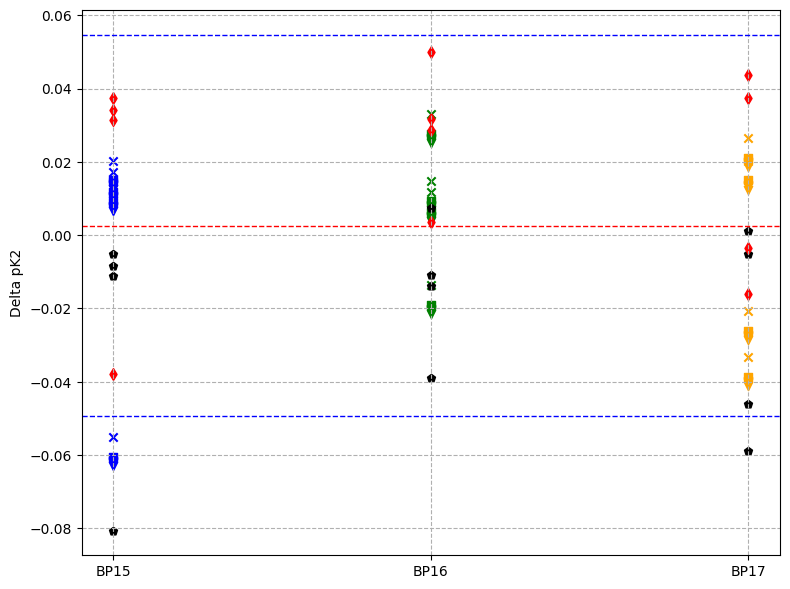

   batch   sample       pK1       pK2     s  delta_cbpK1  delta_cbpK2  \
0   BP15        1  5.855883  8.965442  1.68    -0.035478    -0.080576   
1   BP15        2  5.889835  9.040870  3.89    -0.001527    -0.005148   
2   BP15        3  5.874643  9.034916  2.83    -0.016718    -0.011102   
3   BP15        4  5.874365  9.037691  2.66    -0.016996    -0.008327   
4   BP16        1  5.858520  9.006951  3.38    -0.032842    -0.039067   
5   BP16        2  5.868616  9.032187  2.82    -0.022746    -0.013831   
6   BP16        3  5.860886  9.035228  2.76    -0.030476    -0.010790   
7   BP16        4  5.873992  9.053462  2.88    -0.017370     0.007443   
8   BP17        1  5.879778  9.040833  0.84    -0.011584    -0.005185   
9   BP17        2  5.902116  8.999829  0.53     0.010754    -0.046189   
10  BP17        3  5.882852  9.047052  0.23    -0.008509     0.001034   
11  BP17        4  5.873025  8.987252  0.19    -0.018337    -0.058766   

    delta_avg_pk1fit  delta_avg_pk2fit  delta_pK1_

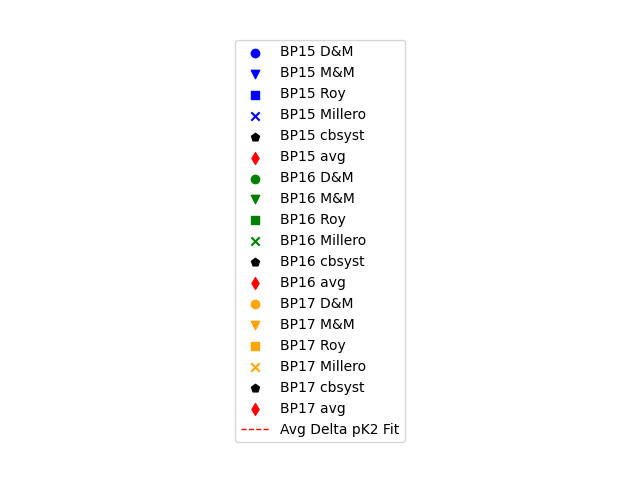

np.float64(0.002591665165992888)

In [140]:
fig, axs = plt.subplots( figsize=(8, 6))
# Calculate 2 sigma confidence intervals
conf_interval= 2 * np.std(df['delta_avg_pk2fit'])

# Plot confidence intervals for delta_pK1
axs.axhline(y=avg_delta_pk2fit + conf_interval, color='blue', linestyle='--', linewidth=1)
axs.axhline(y=avg_delta_pk2fit - conf_interval, color='blue', linestyle='--', linewidth=1)


# Plot delta_pK1

axs.set_ylabel("Delta pK2")
for ID, group in batches.items():
    axs.scatter(group['batch'], group['delta_pK2_DM'], color=colors[ID], label=f"{ID} D&M")
    axs.scatter(group['batch'], group['delta_pK2_MM'], color=colors[ID], marker='v',label=f"{ID} M&M")
    axs.scatter(group['batch'], group['delta_pK2_GP'], color=colors[ID], marker='s', label=f"{ID} Roy")
    axs.scatter(group['batch'], group['delta_pK2_Roy'], color=colors[ID], marker='x', label=f"{ID} Millero")
    axs.scatter(group['batch'], group['delta_cbpK2'], color='black', marker='p', label=f"{ID} cbsyst")
    axs.scatter(group['batch'], group['delta_pK2_Millero'], color='red', marker='d', label=f"{ID} avg")
    
axs.axhline(y=avg_delta_pk2fit, color='red', linestyle='--', linewidth=1, label='Avg Delta pK2 Fit')
axs.grid(True, linestyle='--', alpha=1)
    

plt.tight_layout()
plt.show()

print(df)

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(8, 6))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')
legend = ax_legend.legend(*axs.get_legend_handles_labels(), loc='center')
fig_legend.canvas.draw()



plt.show()
avg_delta_pk2fit

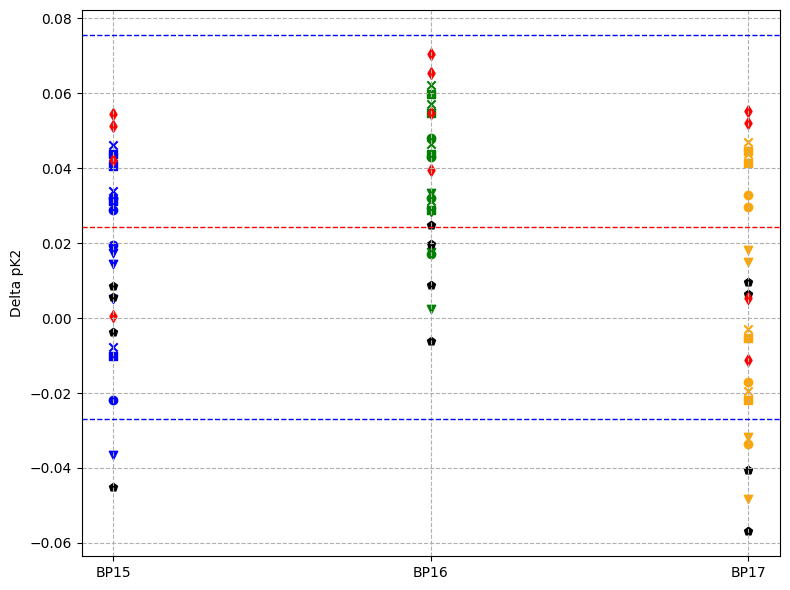

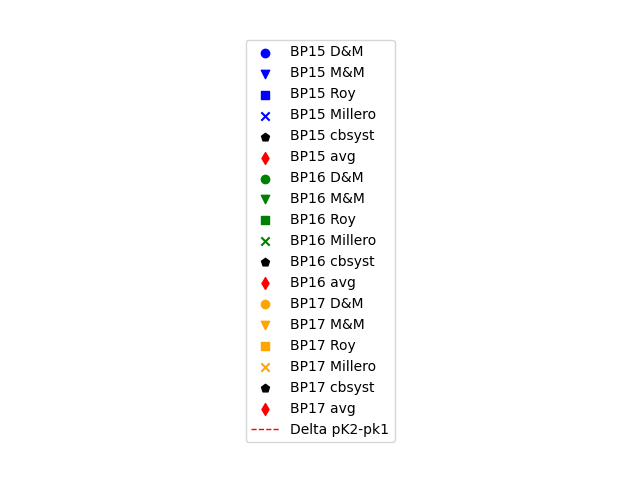

np.float64(0.024290362586743663)

In [141]:
fig, axs = plt.subplots( figsize=(8, 6))
# Calculate 2 sigma confidence intervals
conf_interval= 2 * np.std(df['delta_avg_pk2pk1fit'])

# Plot confidence intervals for delta_pK1
axs.axhline(y=avg_delta_pk2pk1fit + conf_interval, color='blue', linestyle='--', linewidth=1)
axs.axhline(y=avg_delta_pk2pk1fit - conf_interval, color='blue', linestyle='--', linewidth=1)


# Plot delta_pK1

axs.set_ylabel("Delta pK2")
for ID, group in batches.items():
    axs.scatter(group['batch'], group['delta_pk2pk1_DM'], color=colors[ID], label=f"{ID} D&M")
    axs.scatter(group['batch'], group['delta_pk2pk1_MM'], color=colors[ID],marker='v', label=f"{ID} M&M")
    axs.scatter(group['batch'], group['delta_pk2pk1_GP'], color=colors[ID], marker='s', label=f"{ID} Roy")
    axs.scatter(group['batch'], group['delta_pk2pk1_Roy'], color=colors[ID], marker='x', label=f"{ID} Millero")
    axs.scatter(group['batch'], group['delta_cbpk2pk1'], color='black', marker='p', label=f"{ID} cbsyst")
    axs.scatter(group['batch'], group['delta_pk2pk1_Millero'], color='red', marker='d', label=f"{ID} avg")
    
axs.axhline(y=avg_delta_pk2pk1fit, color='red', linestyle='--', linewidth=1, label='Delta pK2-pk1')
axs.grid(True, linestyle='--', alpha=1)
    

plt.tight_layout()
plt.show()


# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(8, 6))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')
legend = ax_legend.legend(*axs.get_legend_handles_labels(), loc='center')
fig_legend.canvas.draw()



plt.show()
avg_delta_pk2pk1fit